Project 5_ Customer_Segmentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('new.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
for col in df.columns:
    temp = df[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')

Column Income contains 24 null values.


In [7]:
df = df.dropna()
print("Total values in the dataset after removing the null values:", len(df))

Total values in the dataset after removing the null values: 2216


In [8]:
df.nunique()

,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


In [9]:
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')

In [10]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],
        axis=1,
        inplace=True)

In [11]:
floats, objects = [], []
for col in df.columns:
    if df[col].dtype == object:
        objects.append(col)
    elif df[col].dtype == float:
        floats.append(col)

print(objects)
print(floats)

['Education', 'Marital_Status']
['Income']


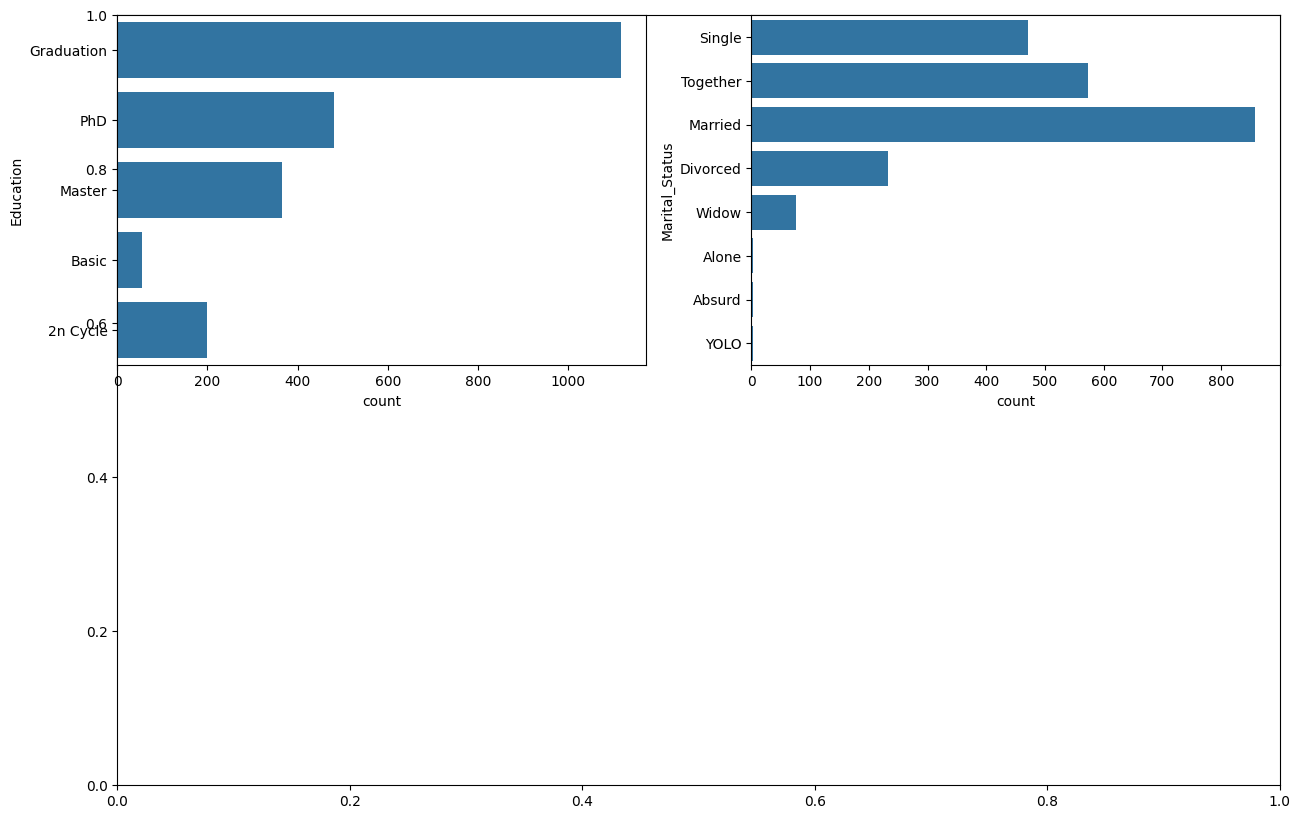

In [12]:
plt.subplots(figsize=(15, 10))
for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)
    sb.countplot(df[col])
plt.show()

In [13]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


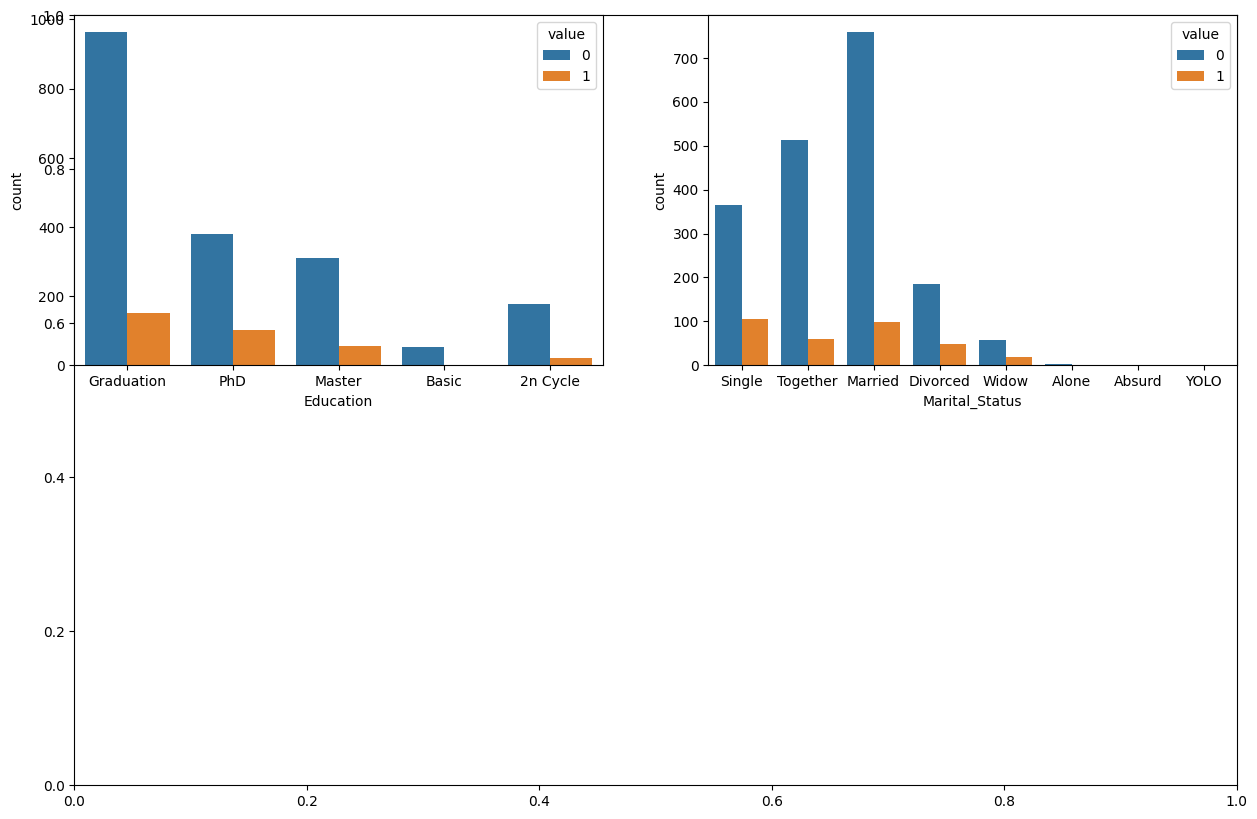

In [14]:
plt.subplots(figsize=(15, 10))
for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)

    df_melted = df.melt(id_vars=[col], value_vars=['Response'], var_name='hue')
    sb.countplot(x=col, hue='value', data=df_melted)
plt.show()

In [15]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

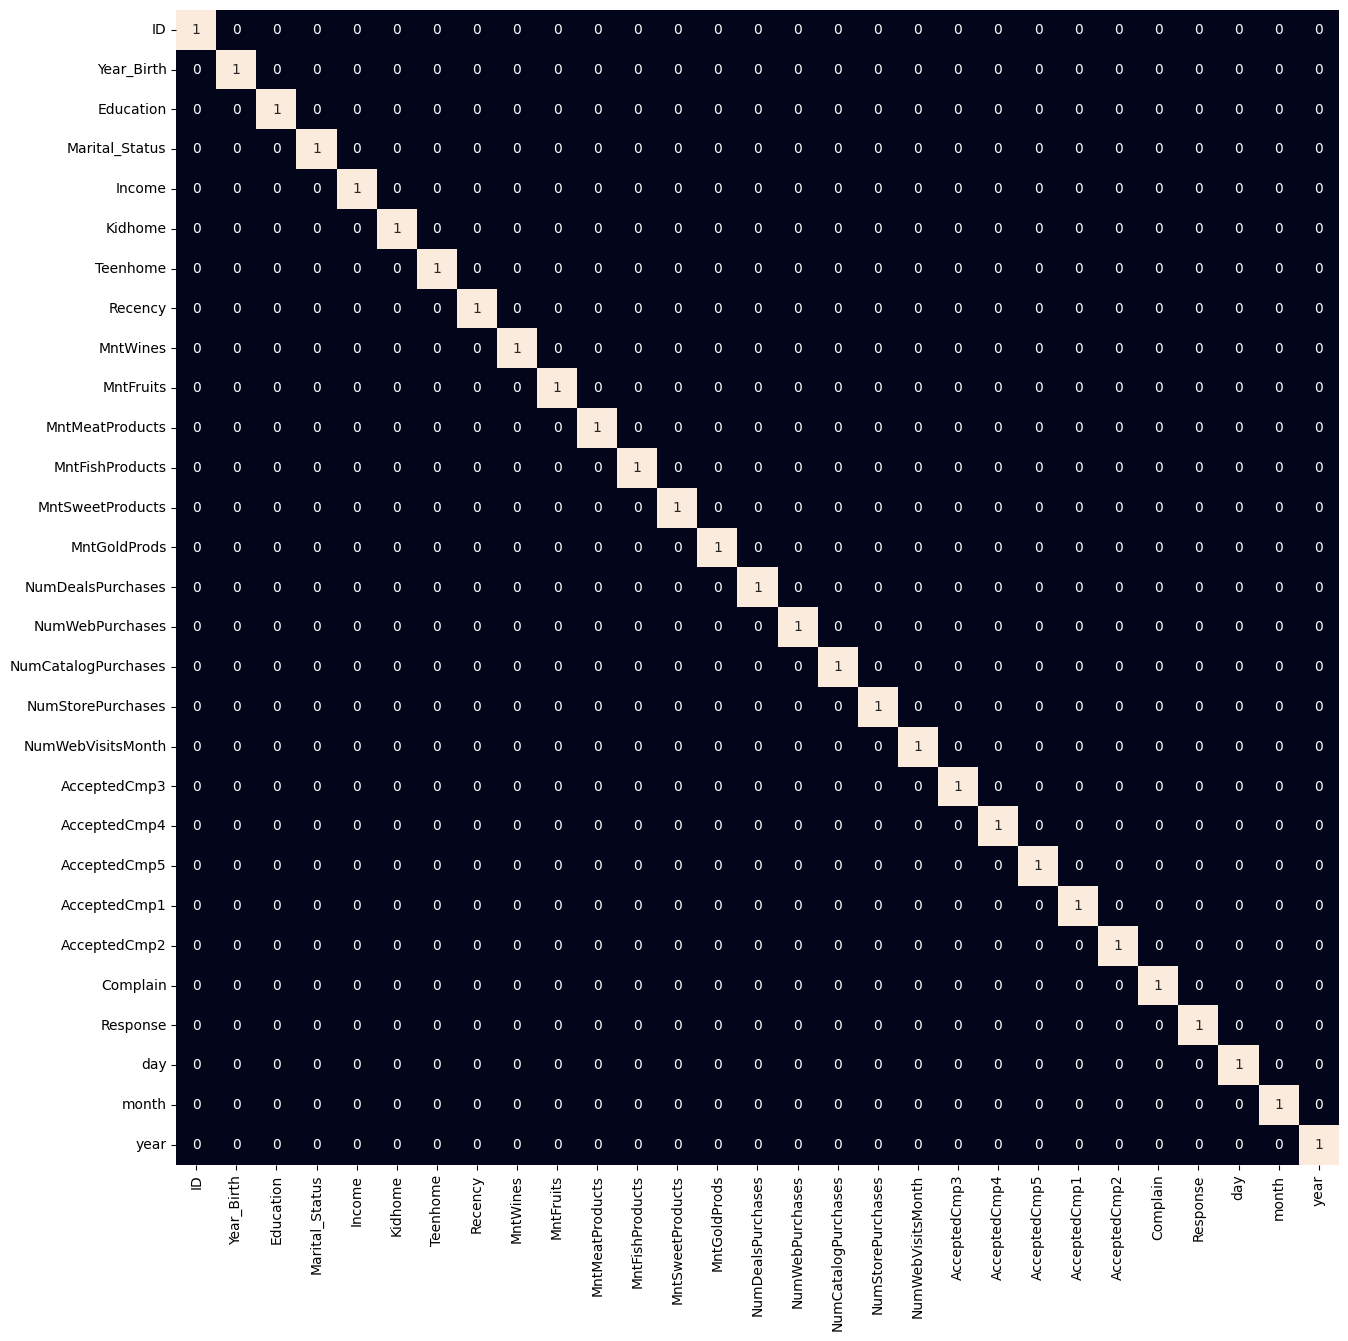

In [16]:
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [17]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

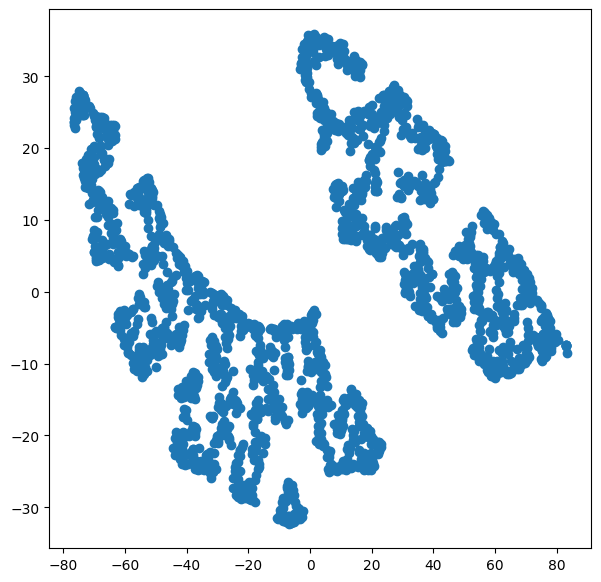

In [18]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [19]:
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(df)
    error.append(model.inertia_)

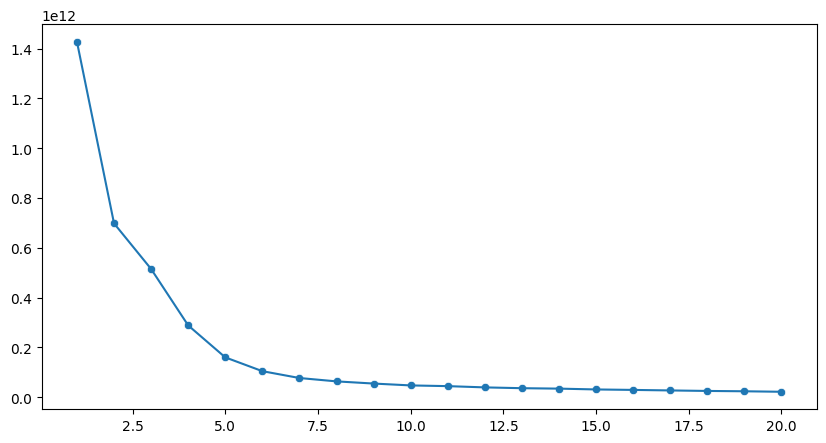

In [20]:
plt.figure(figsize=(10, 5))
sb.lineplot(x=range(1, 21), y=error)
sb.scatterplot(x=range(1, 21), y=error)
plt.show()

In [21]:
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(df)

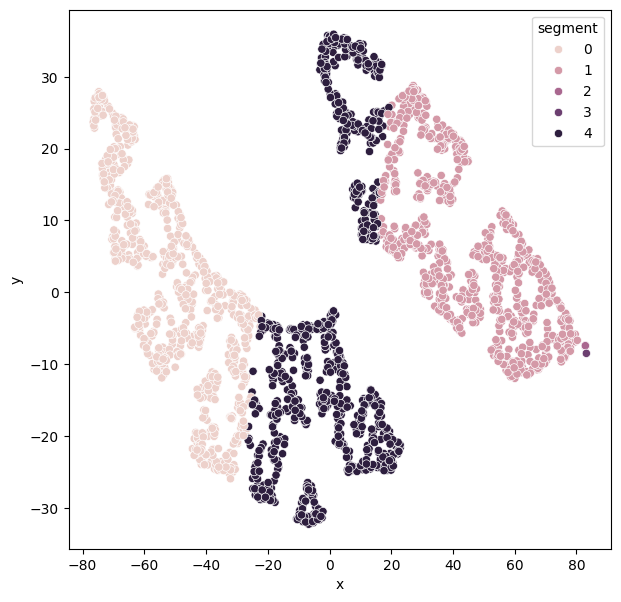

In [25]:
plt.figure(figsize=(7, 7))

df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments, 'cluster': segments})

sb.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()

How many clusters are optimal?



The optimal number of clusters can be determined using the Elbow Method. Looking at the plot generated in the previous cell, we can see the inertia decreases rapidly up to 5 clusters, and then the rate of decrease slows down significantly. This suggests that 5 is a reasonable number of clusters for this dataset.

What is the elbow method?


The Elbow Method is a heuristic used to determine the optimal number of clusters in a dataset. It involves plotting the within-cluster sum of squares (WCSS) for different numbers of clusters. The "elbow" point in the plot, where the rate of decrease of WCSS significantly changes, is considered the optimal number of clusters.

In the previous steps, we calculated the WCSS for different numbers of clusters (cell vTE9-4lnHr58) and plotted the results (cell allswB86HttW). The plot shows an elbow at 5 clusters, indicating that 5 is a suitable number of clusters for this dataset.


What defines each cluster?



To understand what defines each cluster, we can examine the characteristics of the data points within each cluster. I'll group the data by the assigned cluster label and calculate the mean of each feature for each cluster. This will help us see how the clusters differ based on the features in the dataset.

In [23]:
df['cluster'] = segments
cluster_means = df.groupby('cluster').mean()
display(cluster_means)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,day,month,year
cluster,,,,,,,,,,,,,,,,,,,,,
0,5684.920723,1973.104312,2.159944,3.702364,27992.303199,0.813630,0.308762,48.489569,29.390821,5.773296,...,0.084840,0.004172,0.000000,0.001391,0.000000,0.016690,0.114047,15.798331,6.403338,2013.036161
1,5739.694561,1967.283124,2.471409,3.722455,75510.658298,0.093445,0.377964,48.963738,622.739191,56.688982,...,0.071130,0.135286,0.221757,0.178522,0.026499,0.006974,0.235704,15.740586,6.430962,2013.055788
2,5497.428571,1971.857143,3.285714,3.714286,158024.285714,0.285714,0.285714,52.285714,29.000000,3.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,5.285714,2013.142857
3,9432.000000,1977.000000,2.000000,5.000000,666666.000000,1.000000,0.000000,23.000000,9.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,2013.000000
4,5353.702073,1966.220207,2.532383,3.750000,51475.990933,0.419689,0.809585,49.549223,269.734456,17.580311,...,0.066062,0.082902,0.003886,0.016839,0.014249,0.005181,0.106218,15.497409,6.566062,2012.994819


How to visualize clusters?



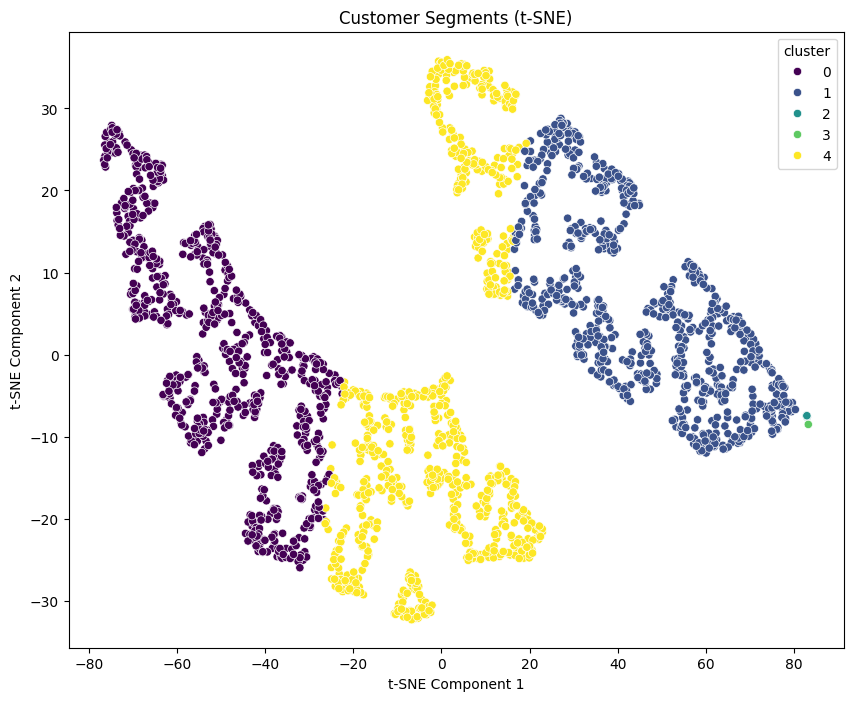

In [26]:
plt.figure(figsize=(10, 8))
sb.scatterplot(x='x', y='y', hue='cluster', data=df_tsne, palette='viridis', legend='full')
plt.title('Customer Segments (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

What is inertia?



Inertia, also known as the within-cluster sum of squares (WCSS), is a metric used to evaluate the quality of a clustering. In K-Means clustering, inertia measures how spread out the data points are within each cluster. Specifically, it's the sum of the squared distances between each data point and the centroid of its assigned cluster.

A lower inertia generally indicates better clustering, as it means the data points are closer to their respective centroids and thus more tightly grouped within clusters. However, inertia decreases as the number of clusters increases, even if the clustering is not meaningful. This is why we use the Elbow Method, which we discussed earlier, to find a balance between minimizing inertia and the number of clusters.

How to scale features?



Feature scaling is a technique used to standardize the range of independent variables or features of the data. In many machine learning algorithms, especially those that rely on distance metrics (like K-Means), the performance can be significantly affected by the scale of the features.

Here are a couple of common methods for feature scaling:

*   **Standardization (Z-score normalization):** This method transforms the data to have a mean of 0 and a standard deviation of 1. It is useful when the data follows a Gaussian distribution and is less affected by outliers. The formula is: $x_{scaled} = (x - mean) / standard\ deviation$

*   **Normalization (Min-Max scaling):** This method scales the data to a fixed range, usually between 0 and 1. It is useful when the data has a known bounded range or when the distribution is not Gaussian. The formula is: $x_{scaled} = (x - min) / (max - min)$

Choosing the appropriate scaling method depends on the specific dataset and the machine learning algorithm being used. In the code, we used `StandardScaler` which performs standardization.

What is silhouette score?



The silhouette score is a metric used to evaluate the quality of clusters created by a clustering algorithm like K-Means. It measures how similar a data point is to its own cluster compared to other clusters. The silhouette score for a single data point ranges from -1 to +1:

*   A score close to +1 indicates that the data point is well-clustered and is far from neighboring clusters.
*   A score close to 0 indicates that the data point is near the decision boundary between two clusters.
*   A score close to -1 indicates that the data point might have been assigned to the wrong cluster.

The average silhouette score across all data points provides an overall evaluation of the clustering. A higher average silhouette score generally suggests better-defined clusters.

How to interpret results?



To interpret the clustering results, you need to examine the characteristics of each cluster to understand what makes them distinct. We have already calculated the mean of each feature for each cluster in cell `f55956ec`. You can analyze these means to identify the key differences between the groups.

For example, you can look at features like:

*   **Income:** Do certain clusters have significantly higher or lower average incomes?
*   **Spending habits:** How do the clusters differ in their spending on various product categories (wines, fruits, meat, etc.)?
*   **Purchasing behavior:** Do some clusters make more purchases through the web, catalog, or store? Are they more likely to use deals?
*   **Engagement:** How do the clusters differ in terms of recent activity (Recency), website visits, and responses to marketing campaigns?
*   **Demographics:** Are there notable differences in age (Year_Birth), education, or marital status between the clusters?
*   **Family size:** How do the number of kids and teens in the household vary across clusters?

By comparing the average values of these features across the clusters, you can gain insights into the profiles of your customer segments. This interpretation will help you understand the unique needs, preferences, and behaviors of each group, which can then inform targeted marketing strategies or business decisions.

What is the business impact?



Understanding customer segments through clustering can have a significant business impact by allowing for more targeted and effective strategies. Here are some ways clustering can impact a business:

*   **Targeted Marketing:** By identifying distinct customer groups with similar characteristics and behaviors, businesses can tailor marketing campaigns to resonate with each specific segment. This can lead to higher conversion rates and better return on investment for marketing efforts.
*   **Product Development:** Understanding the needs and preferences of different customer segments can inform product development and innovation. Businesses can create products or services that cater specifically to the requirements of valuable customer groups.
*   **Customer Relationship Management (CRM):** Clustering can help in developing personalized customer experiences and improving customer retention. By understanding the characteristics of high-value segments, businesses can prioritize their efforts in nurturing those relationships.
*   **Sales and Pricing Strategies:** Different customer segments may have different price sensitivities or purchasing patterns. Clustering can help in optimizing pricing strategies and sales approaches for each segment.
*   **Resource Allocation:** By identifying the most profitable or engaged customer segments, businesses can allocate resources more effectively, focusing on areas that will yield the highest returns.
*   **Risk Management:** Clustering can help identify customer segments that may be at higher risk of churn or default, allowing businesses to take proactive measures to mitigate those risks.

Overall, customer segmentation allows businesses to move away from a one-size-fits-all approach and implement more data-driven and customer-centric strategies that can lead to increased customer satisfaction, loyalty, and profitability.

How to use clustering in marketing?

Clustering is a powerful tool for marketing. By segmenting customers into distinct groups based on their characteristics and behaviors, businesses can tailor their marketing efforts for greater impact. Here are some specific ways clustering can be used in marketing:

*   **Targeted Campaigns:** Create specific marketing messages and campaigns that resonate with the unique needs, preferences, and interests of each customer segment.
*   **Personalized Offers and Promotions:** Offer discounts, promotions, or product recommendations that are most relevant to each cluster's past behavior and likely future purchases.
*   **Channel Optimization:** Determine which marketing channels (email, social media, direct mail, etc.) are most effective for reaching each segment.
*   **Customer Journey Mapping:** Understand how different customer segments interact with your business across various touchpoints and optimize the customer journey for each group.
*   **Customer Lifetime Value (CLTV) Prediction:** Identify high-value customer segments and focus retention efforts on those groups.
*   **New Customer Acquisition:** Identify the characteristics of your most valuable segments and target similar individuals in your acquisition efforts.
*   **Product Recommendations:** Provide personalized product recommendations based on the preferences of customers in the same cluster.
*   **Content Personalization:** Deliver personalized content, such as blog posts, articles, or videos, that are relevant to the interests of each segment.

By leveraging clustering in these ways, businesses can improve customer engagement, increase conversion rates, build stronger customer relationships, and ultimately drive revenue growth.